Here, we want to how level that the electric near field just above cell affected by adjacent cells. In this simulation, we simulated the structure which we called "Beta_Alpha_Beta structure".

In [1]:
import meep as mp
import numpy as np
import math
import matplotlib.pyplot as plt

#sim.reset_meep()
resolution = 500  # pixels/μm

dpml = 1.0  # PML thickness
dsub = 0.5  # substrate thickness
dcaa = 0.06  # air rigion for alpha structure
# alpha structure is that one period = 200nm，sigle cell width = 80nm locate at center
dcab = 0.025 # air rigion for beta structure 
# beta structure is that one period = 200nm，sigle cell width = 150nm locate at center
gp = 0.2  # grating periodicity
gh = 0.6  # grating height
gwa = 0.08 # alpha grating cell width
gwb = 0.15 # beta grating cell width

num_cells = 3 # number of grating unit cells

# air region thickness adjacent to grating
dair = 1 

wvl = 0.532  # center wavelength
fcen = 1 / wvl  # center frequency

glass = mp.Medium(index= 2.6678)

pml_layers = [mp.PML(thickness=dpml, direction = mp.X )]

symmetries = [mp.Mirror(mp.Y)]

sx = dpml + dsub + gh + dair + dpml
sy = num_cells*gp
#sy = ((dcaa + gwa + dcaa)*2 + (dcab + gwb + dcab))*num_cells
cell_size = mp.Vector3(sx, sy)

sources = [
    mp.Source(
        mp.ContinuousSource(frequency = 2), # frequemcy = 2原因是 meep 的 C=1，所以 1/? = 0.5 um，?即是2
        component = mp.Ez,
        center = mp.Vector3(-0.5 * sx + dpml ),
        size = mp.Vector3(y = sy),
    )
]

geometry = [
    mp.Block(
        material=glass,
        size=mp.Vector3(dsub, mp.inf, mp.inf),
        center=mp.Vector3(-0.5 * sx + dpml + 0.04 + dsub/2),
    )
]


In [2]:

for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwb, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp/2 + (j * 3 * gp),
                #-0.5 * sy + gp/2,
            ),
        )
    )
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwa, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp + gp/2  + (j * 3 * gp),
                #-0.5 * sy + gp + gp/2,
            ),
        )
    )
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwb, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + 2*gp + gp/2  + (j * 3 * gp),
                #0.5 * sy - gp/2,
            ),
        )
    )


     block, center = (-0.76,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0.4,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,1,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-2.77556e-17,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0.6,0)
          size (0.6,0.08,1e+20)
          a

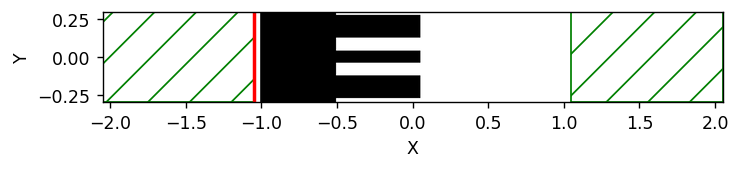

In [3]:
k_point = mp.Vector3()  # Gamma 點表示週期邊界條件
k_points = [k_point]

sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    symmetries=symmetries,
    k_point = mp.Vector3(),
)


%matplotlib inline
plt.figure(dpi = 125)
sim.plot2D()
plt.show()

In [4]:
t_xx = (.532) # Air 光速跑完 波長 532 nm 入射光 所需的 meep unit time
dt = (t_xx / 40) # cut 40 sections in a period time
t = 1000 # Total simulation time

x_obs = -0.5 * sx + dpml + dsub + gh + 0.002 # Set up a x coordinate of observed point
# The meaning of down , cen , up are the cordinate in each cell structure. (Reference stucture diagram just show above)
y_obs_down = -0.5 * sy + gp/2
y_obs_cen = -0.5 * sy + 3*gp/2
y_obs_up = 0.5 * sy - gp/2

print(int((t_xx)/dt))



40


-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.001158 s
Working in 2D dimensions.
Computational cell is 4.1 x 0.6 x 0 with resolution 500
     block, center = (-0.76,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0.4,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,1,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-2.77556e-17,0)
          size (0.

run 0 finished at t = 1000.0 (1000000 timesteps)
     block, center = (-0.76,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0.4,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,1,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-2.77556e-17,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0

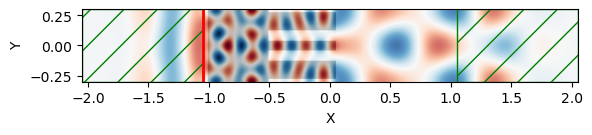

In [5]:

### ez_data_list = [[] for _ in range(int((t_xx)/dt))]

# 儲存場量數值的列表，定義為擁有 10 列的空二維陣列
ez_data_cen = []
ez_data_up = []
ez_data_down = []
###
def get_slice(sim):
    ez_data_cen.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_cen) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))
    ez_data_up.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_up) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))
    ez_data_down.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_down) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))

sim.run(mp.at_every(dt , get_slice) , until = t)

plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [6]:
ez_data_up = np.array(ez_data_up)
ez_data_cen = np.array(ez_data_cen)
ez_data_down = np.array(ez_data_down)


print(len(ez_data_cen))

print(1 + int(round(t_xx/dt)))

76923
41


/home/henry/miniconda3/envs/mp/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


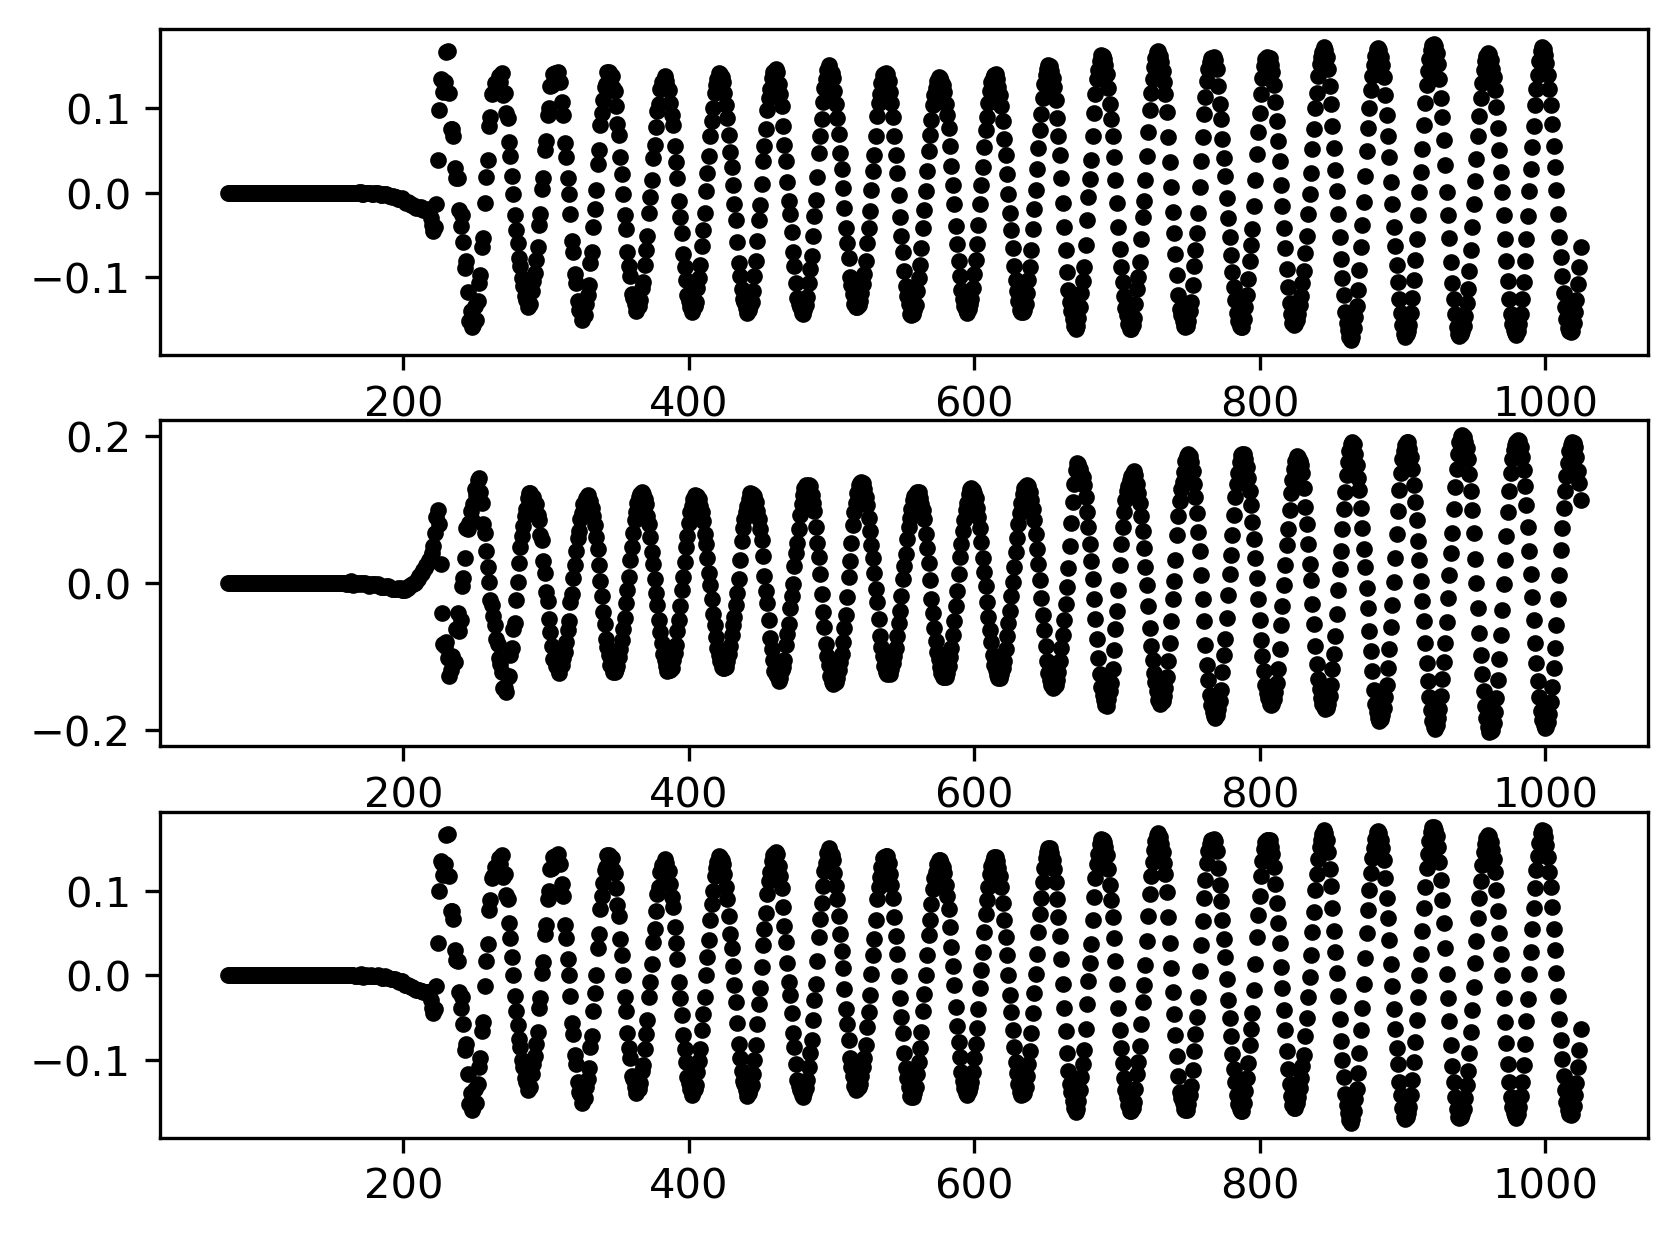

In [7]:
ez_data_cen = np.array(ez_data_cen)
ez_data_up = np.array(ez_data_up)
ez_data_down = np.array(ez_data_down)

#plt.subplot_adjust(hspace = .35)
plt.figure(dpi = 300)
start = round(len(ez_data_cen) / t *1)

for i in range(start,round(len(ez_data_cen) / 75),1):
    plt.subplot(3,1,1)
    plt.plot(i,ez_data_up[i],'k.')
    plt.subplot(3,1,2)
    plt.plot(i,ez_data_cen[i],'k.')
    plt.subplot(3,1,3)
    plt.plot(i,ez_data_down[i],'k.')
    if i ==  (len(ez_data_cen)-1):
        plt.subplot(3,1,1)
        plt.title('upper point')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_up[i],'b .')
        plt.subplot(3,1,2)
        plt.title('center point')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_cen[i],'b .')
        plt.subplot(3,1,3)
        plt.title('downer point')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_down[i],'b .')


In [8]:
# index1 and index2 . When we find the target's Electric field amplitude, we want to know where is amplitude value in array. So we set up index variable before running simulation.
index1_up = 0
index1_cen = 0
index1_down = 0

index2_up = 0
index2_cen = 0
index2_down = 0
# Period_max , period_next_mat . I set up those variables because I plan to use variables to store max amplitude value in a peiod in the following simulation. 
period_max_up = 0
period_max_cen = 0
period_max_down = 0
period_next_max_up = 0
period_next_max_cen = 0
period_next_max_down = 0

# Intial_index , end_index. ==>  "for loop" index
initial_index = round(len(ez_data_cen) / t * 200 )
print(initial_index)
end_index = len(ez_data_cen) - 2*( 1 +int(round(t_xx/dt))) 
print(end_index)

15385
76841


In [9]:

for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_up[j])
        period_next.append(ez_data_up[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- upper point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '------- upper point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '----- 振幅誤差')
        index1 = np.where(ez_data_up == period_max)
        print(index1, '--- upper point index1')
        index2 = np.where(ez_data_up == period_next_max)
        print(index2, '--- upper point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' )
        print('upper point 到達誤差範圍內的所需 meep time unit' , 17690 / len(ez_data_up) * 500 , '\n')
        print('-----------------------------------------------------')
        break

        
for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_cen[j])
        period_next.append(ez_data_cen[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- upper point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '------- upper point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '----- 振幅誤差')
        index1 = np.where(ez_data_cen == period_max)
        print(index1, '--- upper point index1')
        index2 = np.where(ez_data_cen == period_next_max)
        print(index2, '--- upper point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t')
        print('center point 到達誤差範圍內的所需 meep time unit' , 53826 / len(ez_data_cen) * 500 , '\n')
        print('-----------------------------------------------------')
        break
        
    
for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_down[j])
        period_next.append(ez_data_down[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- down point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '------- down point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '----- 振幅誤差')
        index1 = np.where(ez_data_down == period_max)
        print(index1, '--- down point index1')
        index2 = np.where(ez_data_down == period_next_max)
        print(index2, '--- down point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' )
        print('down point 到達誤差範圍內的所需 meep time unit' , 40267 / len(ez_data_down) * 500 , '\n')
        print('-----------------------------------------------------')
        break


(0.17989409727936032+0j) -------- upper point one period 內最大振福
(0.17989335024876293+0j) ------- upper point one next_period 內最大振福
(7.470305973811264e-07+0j) ----- 振幅誤差
(array([17652]),) --- upper point index1
(array([17690]),) --- upper point index2
(0.17989409727936032+0j) 	 (0.17989335024876293+0j) 	 (7.470305973811264e-07+0j) 	
upper point 到達誤差範圍內的所需 meep time unit 114.98511498511499 

-----------------------------------------------------
(0.19506614299556752+0j) -------- upper point one period 內最大振福
(0.19506709075293355+0j) ------- upper point one next_period 內最大振福
(-9.477573660321426e-07+0j) ----- 振幅誤差
(array([53787]),) --- upper point index1
(array([53826]),) --- upper point index2
(0.19506614299556752+0j) 	 (0.19506709075293355+0j) 	 (-9.477573660321426e-07+0j) 	
center point 到達誤差範圍內的所需 meep time unit 349.8693498693499 

-----------------------------------------------------
(0.18242525334547802+0j) -------- down point one period 內最大振福
(0.1824243143177175+0j) ------- down point o

(0.18125654238615385+0j)


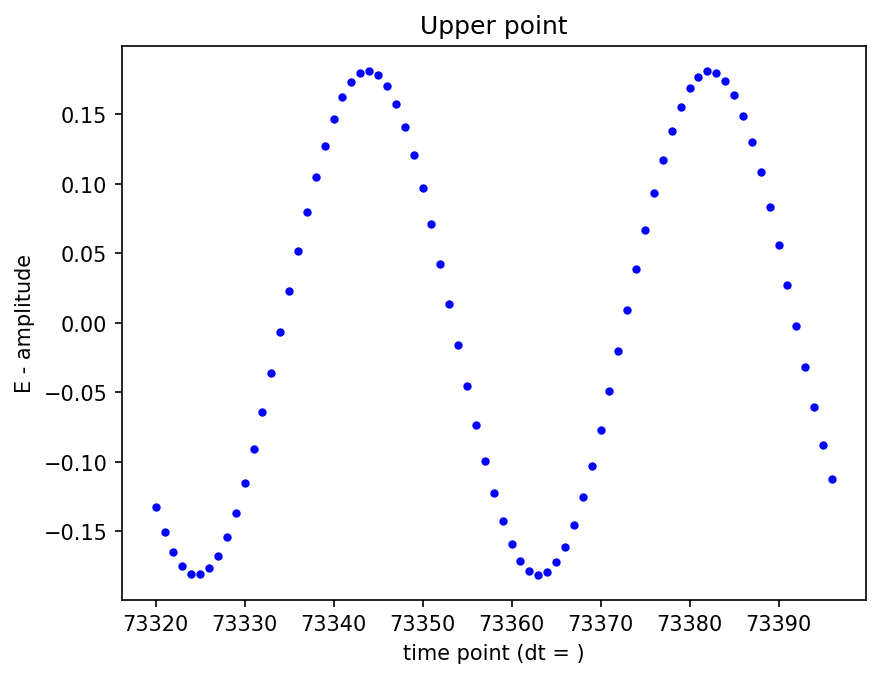

In [10]:
plt.figure(dpi = 150)
plt.title('Upper point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_up[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_up[i] , 'b.')
    if max_value < ez_data_up[i] :
        max_value = ez_data_up[i]

print(max_value)

(0.19496237544520195+0j)


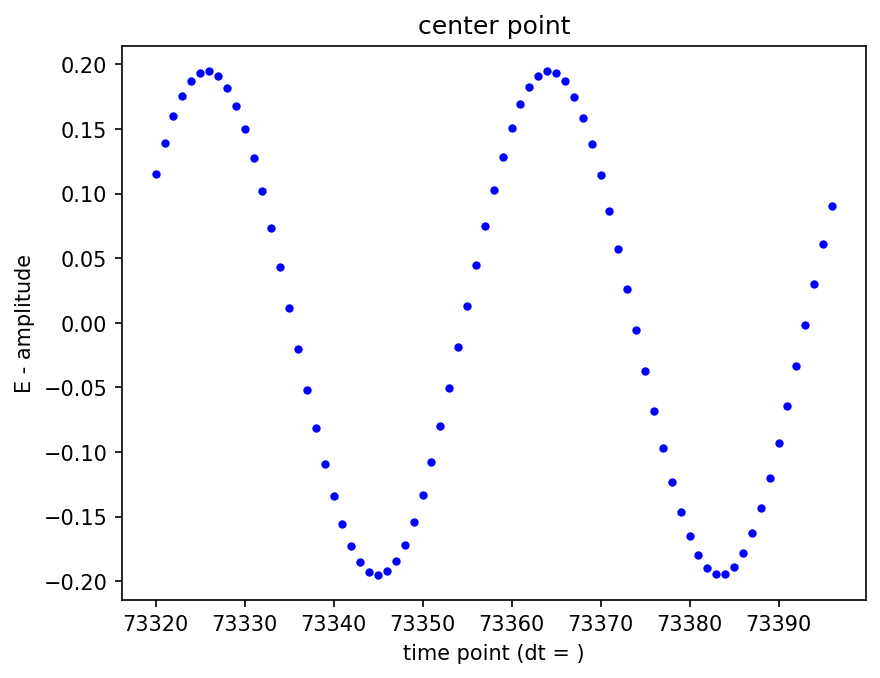

In [11]:
plt.figure(dpi = 150)
plt.title('center point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_cen[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_cen[i] , 'b.')
    if max_value < ez_data_cen[i] :
        max_value = ez_data_cen[i]

print(max_value)

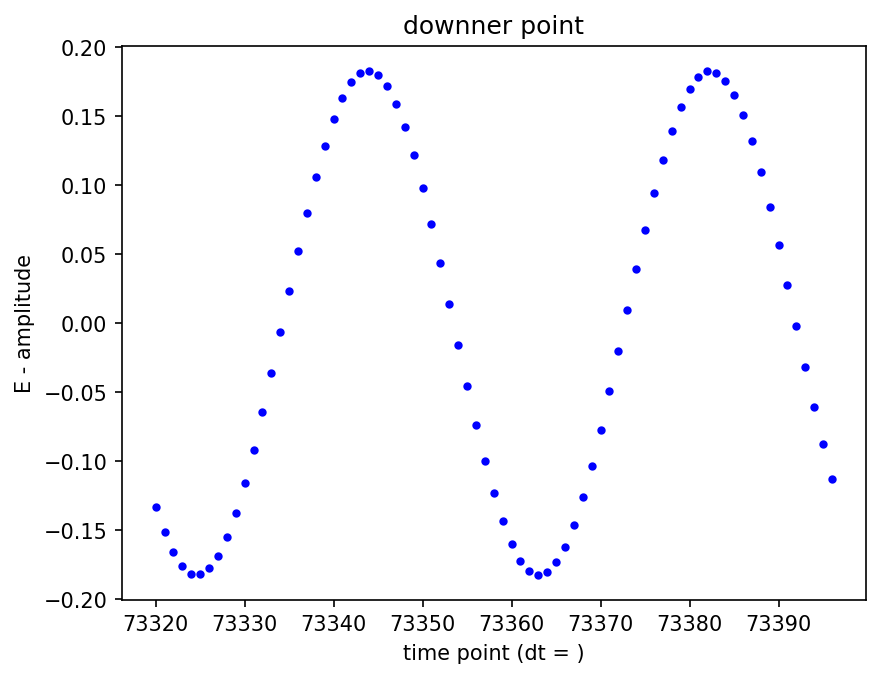

In [12]:
plt.figure(dpi = 150)
plt.title('downner point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_down[i] , 'b.')

# Following is Simulation that Cell height = 300 nm

In [13]:
sim.reset_meep()
resolution = 500  # pixels/μm

dpml = 1.0  # PML thickness
dsub = 0.5  # substrate thickness
dcaa = 0.06  # air rigion for alpha structure
# alpha structure is that one period = 200nm，sigle cell width = 80nm locate at center
dcab = 0.025 # air rigion for beta structure 
# beta structure is that one period = 200nm，sigle cell width = 150nm locate at center
gp = 0.2  # grating periodicity
gh = 0.3  # grating height
gwa = 0.08 # alpha grating cell width
gwb = 0.15 # beta grating cell width

num_cells = 3 # number of grating unit cells

# air region thickness adjacent to grating
dair = 1 

wvl = 0.532  # center wavelength
fcen = 1 / wvl  # center frequency

glass = mp.Medium(index= 2.6678)

pml_layers = [mp.PML(thickness=dpml, direction = mp.X )]

symmetries = [mp.Mirror(mp.Y)]

sx = dpml + dsub + gh + dair + dpml
sy = num_cells*gp
#sy = ((dcaa + gwa + dcaa)*2 + (dcab + gwb + dcab))*num_cells
cell_size = mp.Vector3(sx, sy)

sources = [
    mp.Source(
        mp.ContinuousSource(frequency = 2), # frequemcy = 2原因是 meep 的 C=1，所以 1/? = 0.5 um，?即是2
        component = mp.Ez,
        center = mp.Vector3(-0.5 * sx + dpml ),
        size = mp.Vector3(y = sy),
    )
]

geometry = [
    mp.Block(
        material=glass,
        size=mp.Vector3(dsub, mp.inf, mp.inf),
        center=mp.Vector3(-0.5 * sx + dpml + 0.04 + dsub/2),
    )
]


for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwb, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp/2 + (j * 3 * gp),
                #-0.5 * sy + gp/2,
            ),
        )
    )
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwa, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp + gp/2  + (j * 3 * gp),
                #-0.5 * sy + gp + gp/2,
            ),
        )
    )
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwb, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + 2*gp + gp/2  + (j * 3 * gp),
                #0.5 * sy - gp/2,
            ),
        )
    )




     block, center = (-0.61,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-0.2,0)
          size (0.3,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0.4,0)
          size (0.3,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,1,0)
          size (0.3,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-2.77556e-17,0)
          size (0.3,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0.6,0)
          size (0.3,0.08,1e+20)
          a

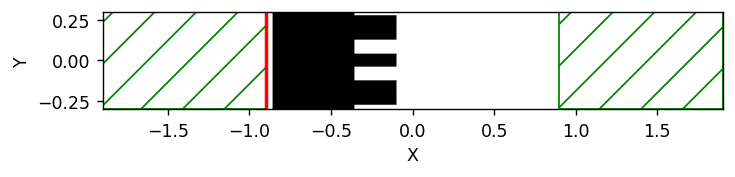

In [14]:
k_point = mp.Vector3()  # Gamma 點表示週期邊界條件
k_points = [k_point]

sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    symmetries=symmetries,
    k_point = mp.Vector3(),
)


%matplotlib inline
plt.figure(dpi = 125)
sim.plot2D()
plt.show()

In [15]:
t_xx = (.532)
dt = (t_xx / 40)
t = 1000
x_obs = -0.5 * sx + dpml + dsub + gh + 0.002
y_obs_down = -0.5 * sy + gp/2
y_obs_cen = -0.5 * sy + 3*gp/2
y_obs_up = 0.5 * sy - gp/2

print(int((t_xx)/dt))


40


-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00115108 s
Working in 2D dimensions.
Computational cell is 3.8 x 0.6 x 0 with resolution 500
     block, center = (-0.61,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-0.2,0)
          size (0.3,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0.4,0)
          size (0.3,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,1,0)
          size (0.3,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-2.77556e-17,0)
          size (

Meep progress: 999.94/1000.0 = 100.0% done in 1432.3s, 0.1s to go
run 0 finished at t = 1000.0 (1000000 timesteps)
     block, center = (-0.61,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-0.2,0)
          size (0.3,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0.4,0)
          size (0.3,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,1,0)
          size (0.3,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-2.77556e-17,0)
          size (0.3,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon 

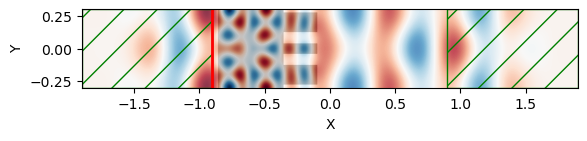

In [16]:

# 儲存場量數值的列表
ez_data_cen = []
ez_data_up = []
ez_data_down = []
###
def get_slice(sim):
    ez_data_cen.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_cen) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))
    ez_data_up.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_up) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))
    ez_data_down.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_down) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))

sim.run(mp.at_every(dt , get_slice) , until = t)

plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [17]:
ez_data_up = np.array(ez_data_up)
ez_data_cen = np.array(ez_data_cen)
ez_data_down = np.array(ez_data_down)


print(len(ez_data_cen))

print(1 + int(round(t_xx/dt)))

76923
41


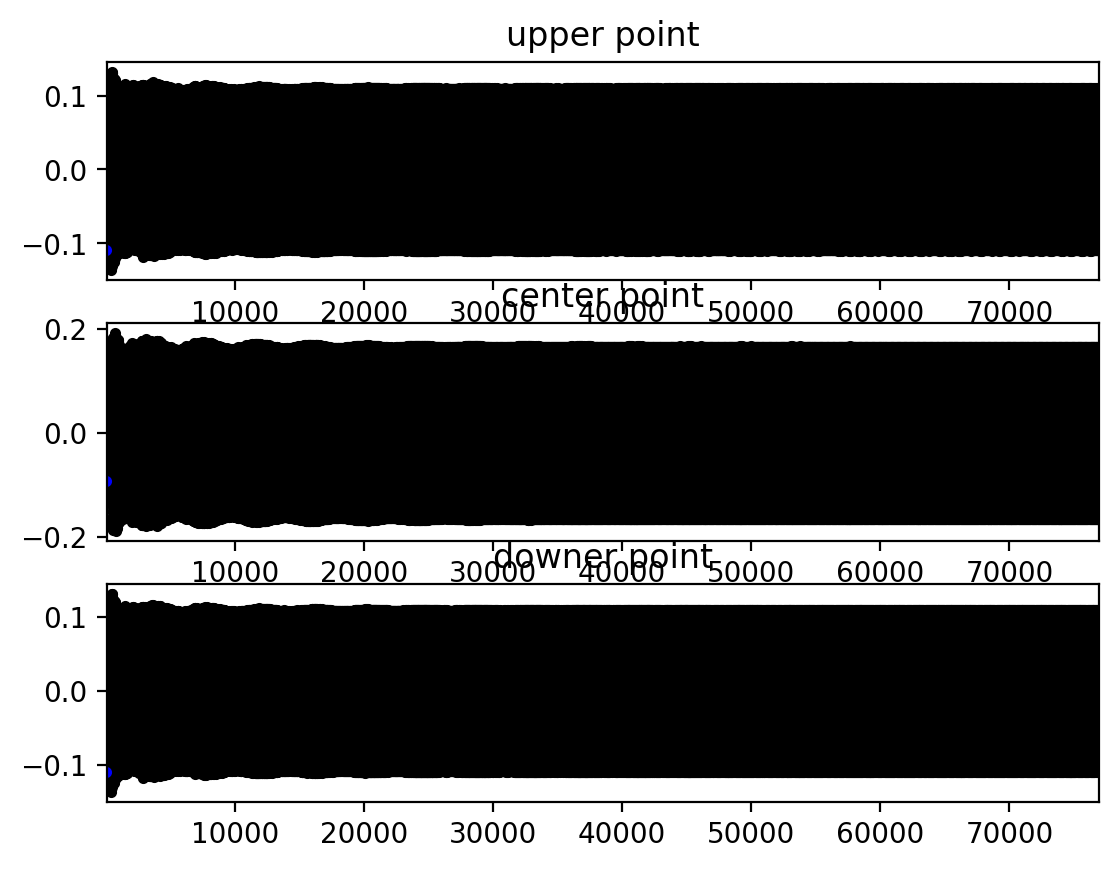

In [18]:
ez_data_cen = np.array(ez_data_cen)
ez_data_up = np.array(ez_data_up)
ez_data_down = np.array(ez_data_down)

#plt.subplot_adjust(hspace = .35)
plt.figure(dpi = 200)
start = round(len(ez_data_cen) / t *1)

for i in range(start,len(ez_data_cen),1):
    plt.subplot(3,1,1)
    plt.plot(i,ez_data_up[i],'k.')
    plt.subplot(3,1,2)
    plt.plot(i,ez_data_cen[i],'k.')
    plt.subplot(3,1,3)
    plt.plot(i,ez_data_down[i],'k.')
    if i ==  (len(ez_data_cen)-1):
        plt.subplot(3,1,1)
        plt.title('upper point')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_up[i],'b .')
        plt.subplot(3,1,2)
        plt.title('center point')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_cen[i],'b .')
        plt.subplot(3,1,3)
        plt.title('downer point')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_down[i],'b .')


15385
76841


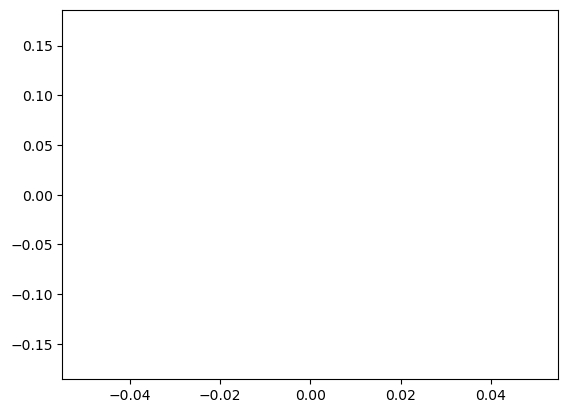

In [19]:
# index1 and index2 . When we find the target's Electric field amplitude, we want to know where is amplitude value in array. So we set up index variable before running simulation.
index1_up = 0
index1_cen = 0
index1_down = 0

index2_up = 0
index2_cen = 0
index2_down = 0
# Period_max , period_next_mat . I set up those variables because I plan to use variables to store max amplitude value in a peiod in the following simulation. 
period_max_up = 0
period_max_cen = 0
period_max_down = 0
period_next_max_up = 0
period_next_max_cen = 0
period_next_max_down = 0

# Intial_index , end_index. ==>  "for loop" index
initial_index = round(len(ez_data_cen) / t * 200 )
print(initial_index)
end_index = len(ez_data_cen) - 2*( 1 +int(round(t_xx/dt))) 
print(end_index)

for i in range(initial_index , end_index):
    plt.plot(ez_data_cen[i])

In [20]:

for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_up[j])
        period_next.append(ez_data_up[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- upper point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '------- upper point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '----- 振幅誤差')
        index1 = np.where(ez_data_up == period_max)
        print(index1, '--- upper point index1')
        index2 = np.where(ez_data_up == period_next_max)
        print(index2, '--- upper point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' )
        print('upper point 到達誤差範圍內的所需 meep time unit' , 23287 / len(ez_data_up) * 500 , '\n')
        print('-----------------------------------------------------')
        break

        
for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_cen[j])
        period_next.append(ez_data_cen[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- upper point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '------- upper point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '----- 振幅誤差')
        index1 = np.where(ez_data_cen == period_max)
        print(index1, '--- upper point index1')
        index2 = np.where(ez_data_cen == period_next_max)
        print(index2, '--- upper point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t')
        print('center point 到達誤差範圍內的所需 meep time unit' , 73397 / len(ez_data_cen) * 500 , '\n')
        print('-----------------------------------------------------')
        break
        
    
for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_down[j])
        period_next.append(ez_data_down[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- down point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '------- down point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '----- 振幅誤差')
        index1 = np.where(ez_data_down == period_max)
        print(index1, '--- down point index1')
        index2 = np.where(ez_data_down == period_next_max)
        print(index2, '--- down point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' )
        print('down point 到達誤差範圍內的所需 meep time unit' , 18749 / len(ez_data_down) * 500 , '\n')
        print('-----------------------------------------------------')
        break


dt_ = str(dt)

(0.10964510729155828+0j) -------- upper point one period 內最大振福
(0.1096456681978618+0j) ------- upper point one next_period 內最大振福
(-5.609063035150186e-07+0j) ----- 振幅誤差
(array([23249]),) --- upper point index1
(array([23287]),) --- upper point index2
(0.10964510729155828+0j) 	 (0.1096456681978618+0j) 	 (-5.609063035150186e-07+0j) 	
upper point 到達誤差範圍內的所需 meep time unit 151.36565136565136 

-----------------------------------------------------
(0.16539122071280207+0j) -------- upper point one period 內最大振福
(0.16539070479179208+0j) ------- upper point one next_period 內最大振福
(5.15921009996978e-07+0j) ----- 振幅誤差
(array([73320]),) --- upper point index1
(array([73397]),) --- upper point index2
(0.16539122071280207+0j) 	 (0.16539070479179208+0j) 	 (5.15921009996978e-07+0j) 	
center point 到達誤差範圍內的所需 meep time unit 477.08097708097705 

-----------------------------------------------------
(0.10826518435546932+0j) -------- down point one period 內最大振福
(0.1082650877924604+0j) ------- down point one 

(0.10982097641205626+0j)


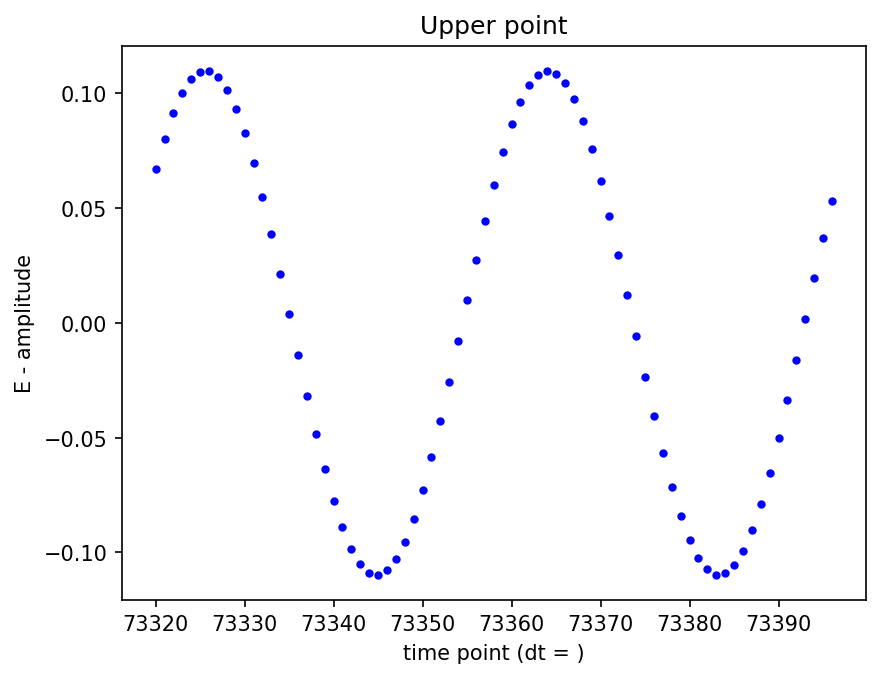

In [21]:
plt.figure(dpi = 150)
plt.title('Upper point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_up[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_up[i] , 'b.')
    if max_value < ez_data_up[i] :
        max_value = ez_data_up[i]
        
print(max_value)

(0.16539122071280207+0j)


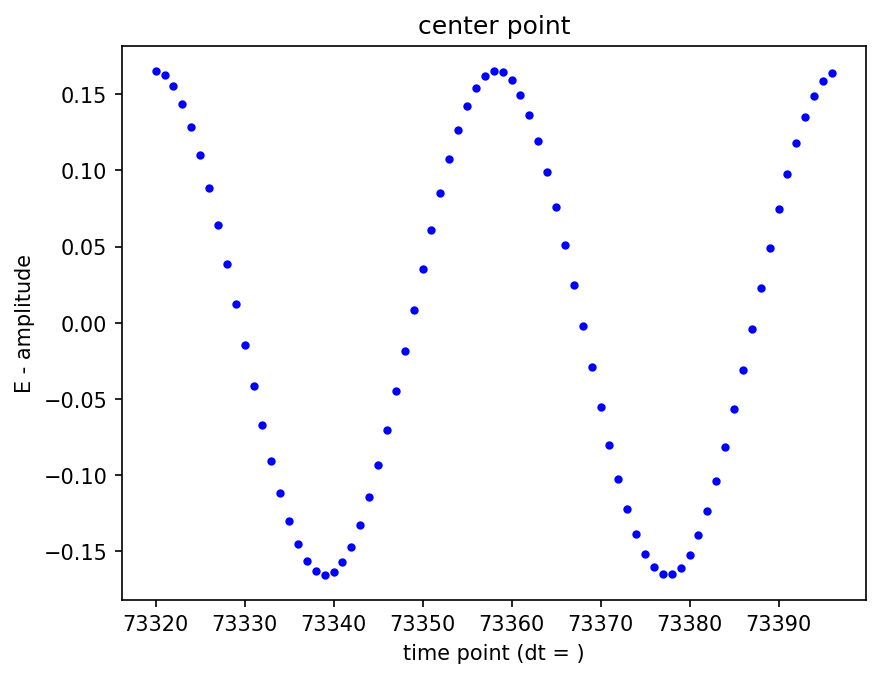

In [22]:
plt.figure(dpi = 150)
plt.title('center point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_cen[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_cen[i] , 'b.')
    if max_value < ez_data_cen[i] :
        max_value = ez_data_cen[i]

print(max_value)

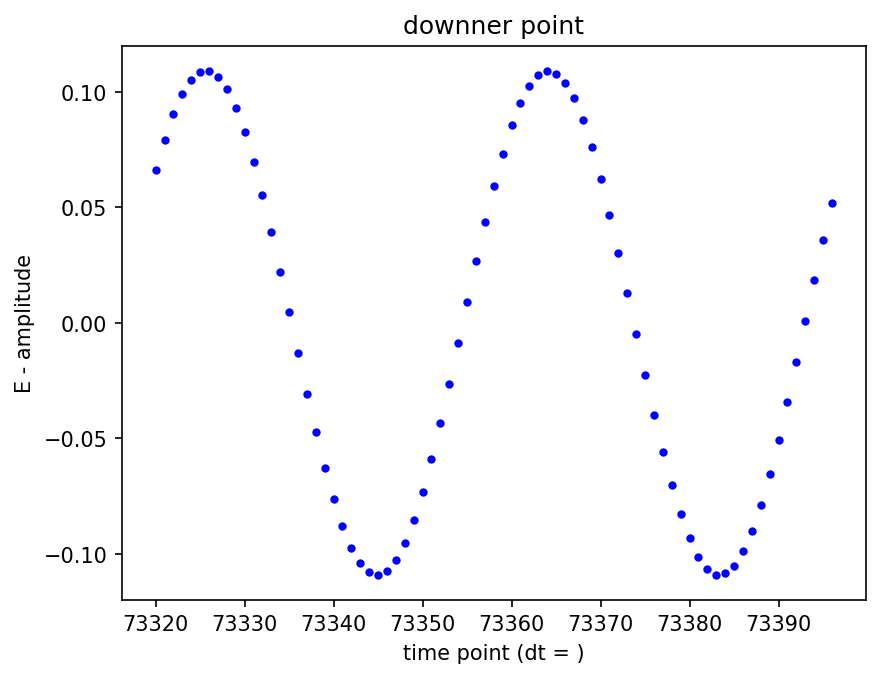

In [23]:
plt.figure(dpi = 150)
plt.title('downner point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_down[i] , 'b.')

In [5]:
sim.reset_meep()
f = plt.figure(dpi = 125)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)
plt.close()

sim.run(mp.at_every(1, Animate), until = 50)
plt.close()

filename = "2 beta alpha beta structure.mp4"
Animate.to_mp4(10, filename)

from IPython.display import Video
Video(filename)

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000506878 s
Working in 2D dimensions.
Computational cell is 17.1 x 0.6 x 0 with resolution 50
     block, center = (-7.26,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.77556e-17,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
time for set_epsilon = 0.0112 s
-----------


Meep: using complex fields.
     block, center = (-7.26,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.77556e-17,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
Normalizing field data...
run 1 finished at t = 50.0 (5000 timesteps)
Generating MP4...
